## Project Info

All infos and the original dataset can be found on: https://www.kaggle.com/jmmvutu/ecommerce-users-of-a-french-c2c-fashion-store?select=6M-0K-99K.users.dataset.public.csv

### Importing Libraries

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import pandasql as ps
import seaborn as sns



/Users/samtims/.pyenv/versions/3.8.12/envs/frieda/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### loading and checking datasets 

In [2]:
df_users = pd.read_csv("6M-0K-99K.users.dataset.public.csv")

In [3]:
df_users

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,10,3,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,7,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,0,0,M,1,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,0,0,M,1,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,350630276238833248,user,Belgique,en,3,8,0,0,0,0.0,0,0,M,1,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,2006580738726207028,user,Italie,it,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,267,3204,106.80,8.90,it


## Description of dataset

In [4]:
df_users.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [5]:
df_users.sort_values(by=['productsSold'], ascending=False)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,10,3,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,7,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34325,-1421910227984300933,user,Etats-Unis,en,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,704,3200,106.67,8.89,us
34324,3456820073788968616,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,367,3200,106.67,8.89,fr
34323,-1254806636236287317,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,704,3200,106.67,8.89,fr
34322,5028604204265727927,user,Allemagne,de,3,8,0,0,0,0.0,1,0,F,2,mrs,False,False,False,True,335,3200,106.67,8.89,de


In [6]:
df_comparison = pd.read_csv("comparison_of_sellers_by_gender_and_country.csv")

In [7]:
df_comparison.head()

,country,sex,nbsellers,meanproductssold,meanproductslisted,meansellerpassrate,totalproductssold,totalproductslisted,meanproductsbought,meanproductswished,meanproductsliked,totalbought,totalwished,totalproductsliked,meanfollowers,meanfollows,percentofappusers,percentofiosusers,meanseniority
0,Allemagne,Female,116,4.03,2.72,27.33,468,315,3.05,34.66,35.28,354,4021,4092,9.5,8.9,54.0,49.0,3060.336207
1,Allemagne,Male,34,2.00,1.00,19.15,68,34,1.62,3.38,31.79,55,115,1081,7.8,8.4,79.0,64.0,3089.058824
2,Arménie,Female,1,0.00,25.00,0.00,0,25,0.00,0.00,1.00,0,0,1,4.0,8.0,NaN,NaN,3201.000000
3,Australie,Female,18,0.94,1.33,10.44,17,24,6.11,17.72,209.28,110,319,3767,7.5,9.3,55.0,55.0,3103.666667
4,Australie,Male,3,6.00,4.00,33.33,18,12,8.00,24.00,38.33,24,72,115,12.7,8.3,66.0,66.0,3085.666667


In [8]:
df_top_sellers = pd.read_csv("countries_with_top_sellers_fashion_c2c.csv")

In [9]:
df_top_sellers.head()

,country,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,topmalesellers,countrysoldratio,bestsoldratio,toptotalproductssold,totalproductssold,toptotalproductslisted,totalproductslisted,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,Taiwan,1,1,100.0,100.0,100.0,1,0,1,0,1.02,1.02,57,57,56,56,57.00,56.00,57.000000,56.000000,11.0,11.0,83.0,8.0,83.0,8.0
1,Slovaquie,2,1,50.0,0.0,0.0,0,2,0,1,2.00,1.93,27,28,14,14,27.00,14.00,14.000000,7.000000,17.0,15.0,10.5,8.5,15.0,8.0
2,Lettonie,4,2,50.0,100.0,100.0,4,0,2,0,2.31,2.25,81,83,36,36,40.50,18.00,20.750000,9.000000,120.3,11.5,21.0,52.3,38.0,98.5
3,Bulgarie,9,4,44.4,66.7,100.0,6,3,4,0,2.07,2.10,145,170,69,82,36.25,17.25,18.888889,9.111111,98.3,19.0,28.6,31.6,46.3,19.0
4,Chypre,4,1,25.0,100.0,100.0,4,0,1,0,0.69,0.62,41,56,66,81,41.00,66.00,14.000000,20.250000,17.3,11.0,21.3,10.3,39.0,17.0


## Correlation Matrix of Users Dataframe

Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

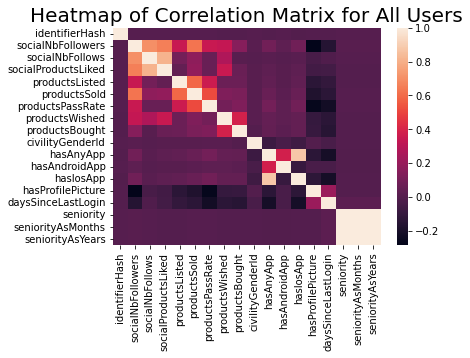

In [10]:
a=sns.heatmap(df_users.corr()) 
a.set_title('Heatmap of Correlation Matrix for All Users', fontsize = 20)

In [11]:
ps.sqldf(
    """
    SELECT *
    FROM df_users
    """
    ).head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1,mr,1,0,1,1,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2,mrs,1,0,1,1,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,10,3,F,2,mrs,1,0,1,0,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,7,0,F,2,mrs,1,0,1,0,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,0,0,F,2,mrs,0,0,0,1,22,2854,95.13,7.93,us


### Are e-commerce users interested in social network feature ?


In [12]:
# On Average a user has 3.43 followers and follows 8.43 other users. 

ps.sqldf(
    """
    SELECT COUNT(identifierHash), ROUND(AVG(socialNbFollowers),2) AS avg_num_followers, ROUND(AVG(socialNbFollows),2) AS avg_num_follows
    FROM df_users
    """
    ).head()

,COUNT(identifierHash),avg_num_followers,avg_num_follows
0,98913,3.43,8.43


In [13]:
ps.sqldf(
    """
    SELECT COUNT(identifierHash) AS Inactive_users
    FROM df_users
    WHERE productsSold = 0 and productsBought = 0
    """
    ).head()

,Inactive_users
0,92020


In [14]:
# The top 5 sellers have quite a lot of followers but do not follow a lot of other users: 

ps.sqldf(
    """
    SELECT identifierHash, socialNbFollowers AS num_followers, socialNbFollows AS num_follows, productsSold
    FROM df_users
    GROUP BY identifierHash
    ORDER BY productsSold DESC
    """
    ).head()

,identifierHash,num_followers,num_follows,productsSold
0,-1097895247965112460,147,10,174
1,2347567364561867620,167,8,170
2,6870940546848049750,137,13,163
3,-4640272621319568052,131,10,152
4,-5175830994878542658,167,8,125


In [15]:
# Top 5 buyers do not have a lot of followers nor do they follow a lot of other users. 

ps.sqldf(
    """
    SELECT identifierHash, socialNbFollowers AS num_followers, socialNbFollows AS num_follows, productsSold, productsBought
    FROM df_users
    GROUP BY identifierHash
    ORDER BY productsBought DESC
    """
    ).head()

,identifierHash,num_followers,num_follows,productsSold,productsBought
0,1513245000248951841,23,8,1,405
1,-8963521929858247469,16,9,12,279
2,5666274082428572635,43,23,8,174
3,6048206785556031922,73,27,69,115
4,674361423306028463,121,0,108,105


In [16]:
ps.sqldf(
    """
    SELECT identifierHash, socialNbFollowers AS num_followers, socialNbFollows AS num_follows, productsSold, productsBought
    FROM df_users
    GROUP BY identifierHash
    ORDER BY num_followers DESC
    """
    ).head()

,identifierHash,num_followers,num_follows,productsSold,productsBought
0,3718185418791028367,744,13764,104,0
1,2119852871524485845,353,8268,15,0
2,4083881020900546640,205,2013,1,0
3,-9221801386431225948,176,60,81,0
4,-674375683452639256,172,50,34,0


### How likely are people from other countries to sign up in a C2C website?


In [17]:
ps.sqldf(
    """
    SELECT COUNT(DISTINCT country)
    FROM df_users
    WHERE country != 'France'
    """
    )

,COUNT(DISTINCT country)
0,199


### How are recent login and products sold and/or bought related ?


In [18]:
ps.sqldf(
    """
    SELECT identifierHash ,seniority, daysSinceLastLogin, productsSold,productsBought
    FROM df_users
    ORDER BY daysSinceLastLogin
    """
    )

,identifierHash,seniority,daysSinceLastLogin,productsSold,productsBought
0,-1097895247965112460,3196,11,174,1
1,6870940546848049750,3203,11,163,3
2,7631788075812383072,3196,11,123,0
3,674361423306028463,3198,11,108,105
4,2550976450216757005,2857,11,106,0
...,...,...,...,...,...
98908,6146224015436500842,3205,709,0,0
98909,8731670668452064125,3205,709,0,0
98910,-1212017580373644288,3205,709,0,0
98911,-3658933961657557269,3205,709,0,0


In [19]:
test="test"

In [20]:
testb="testb"